In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('supermarket_sales - Sheet1 (3).csv')

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [45]:
#  finding Object Variable In Data Set


In [8]:
obj=[i for i in df if df[i].dtype=='object']
print ('The object variables are:',obj)

The object variables are: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


In [9]:
numerical=[i for i in df if df[i].dtype!='object']
print ('The numerical variables are:',numerical)

The numerical variables are: ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [10]:
for i in obj:
    if i!='Invoice ID' and i!='Date' and i!='Time':
        print(i,'...',df[i].nunique(),'...',df[i].unique())
        print(i,'...',df[i].value_counts())

Branch ... 3 ... ['A' 'C' 'B']
Branch ... A    340
B    332
C    328
Name: Branch, dtype: int64
City ... 3 ... ['Yangon' 'Naypyitaw' 'Mandalay']
City ... Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Customer type ... 2 ... ['Member' 'Normal']
Customer type ... Member    501
Normal    499
Name: Customer type, dtype: int64
Gender ... 2 ... ['Female' 'Male']
Gender ... Female    501
Male      499
Name: Gender, dtype: int64
Product line ... 6 ... ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Product line ... Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
Payment ... 3 ... ['Ewallet' 'Cash' 'Credit card']
Payment ... Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


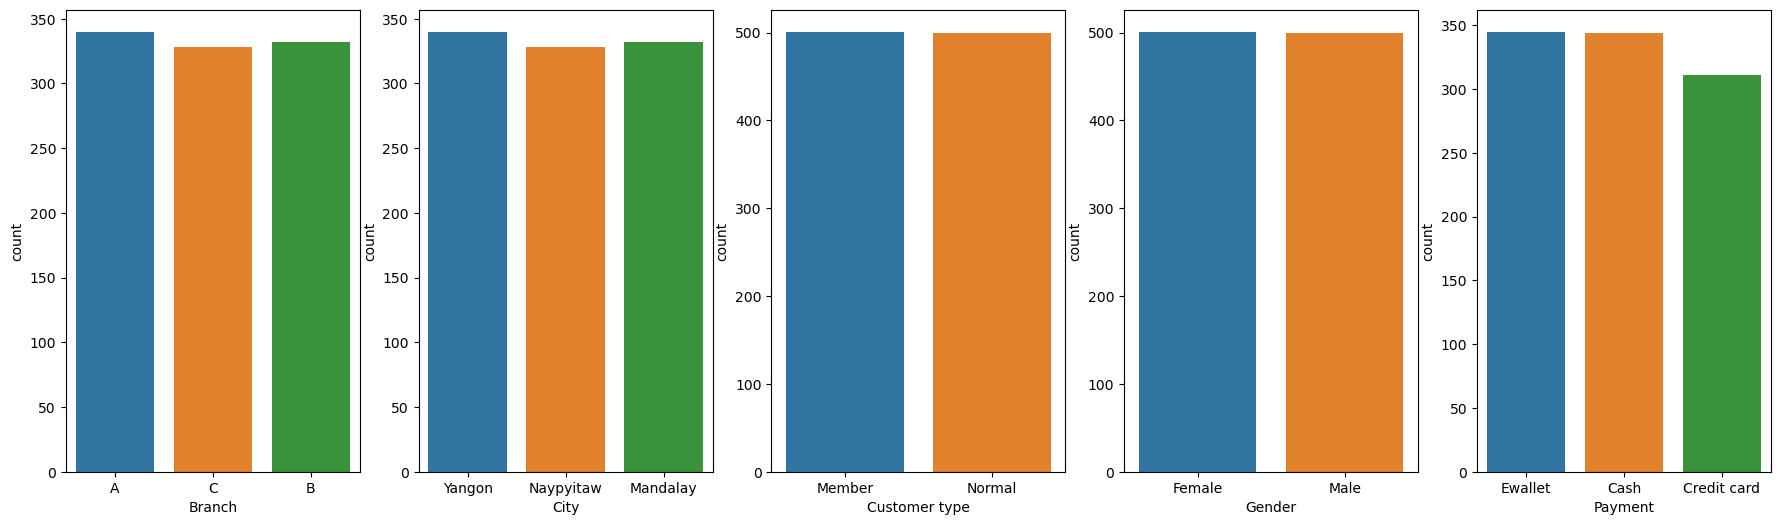

In [11]:
plt.figure(figsize=(22,6))
plt.subplot(1,5,1)
sns.countplot(x='Branch',data=df)
plt.subplot(1,5,2)
sns.countplot(x='City',data=df)
plt.subplot(1,5,3)
sns.countplot(x='Customer type',data=df)
plt.subplot(1,5,4)
sns.countplot(x='Gender',data=df)
plt.subplot(1,5,5)
sns.countplot(x='Payment',data=df)
plt.show()


In [12]:
df.groupby(['Product line','Branch'])['gross income'].agg(['count','mean'])

count       mean
Product line           Branch                  
Electronic accessories A          60  14.537392
                       B          55  14.763155
                       C          55  16.423355
Fashion accessories    A          51  15.249775
                       B          62  12.606234
                       C          65  15.794923
Food and beverages     A          58  14.091216
                       B          50  14.490370
                       C          66  17.147803
Health and beauty      A          47  12.763681
                       B          53  17.952075
                       C          52  15.215500
Home and lifestyle     A          65  16.422854
                       B          50  16.713490
                       C          45  14.704289
Sports and travel      A          59  15.635754
                       B          62  15.351919
                       C          45  16.679289

In [13]:
l=df.groupby(['Branch'])['gross income'].sum().reset_index()

In [14]:
l

,Branch,gross income
0,A,5057.1605
1,B,5057.0320
2,C,5265.1765


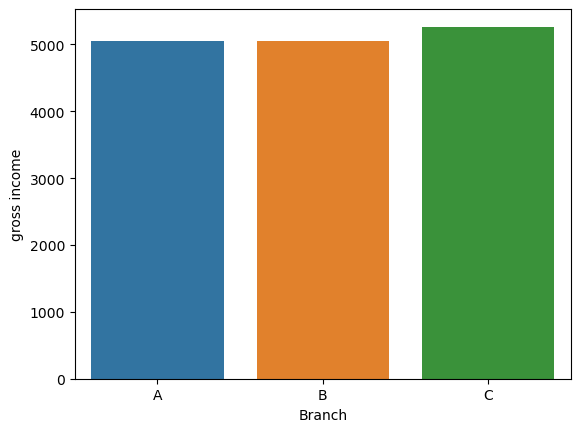

In [15]:
sns.barplot(x='Branch',y='gross income',data=l);

In [16]:
a=df.groupby(['Branch'])['Rating'].mean().reset_index()

In [17]:
a

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


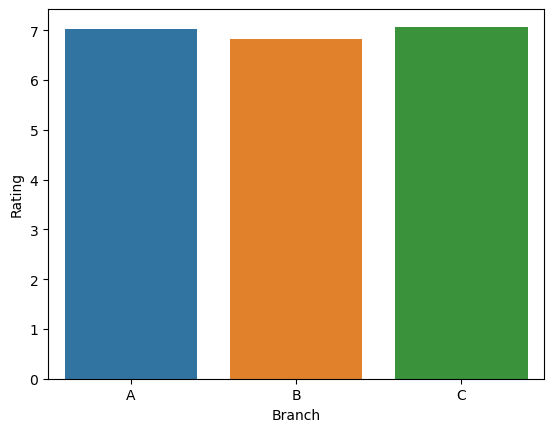

In [18]:
sns.barplot(x='Branch',y='Rating',data=a)
plt.show()

In [19]:
c=df[df['Branch']=='C']

In [20]:
c

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2/6/2019,10:42,Ewallet,397.68,4.761905,19.8840,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,3/29/2019,19:12,Ewallet,823.40,4.761905,41.1700,4.3
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9


In [21]:
c.groupby(['Customer type'])['gross income'].sum().reset_index()

,Customer type,gross income
0,Member,2708.6325
1,Normal,2556.5440


In [22]:
c['Customer type'].value_counts()

Member    169
Normal    159
Name: Customer type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


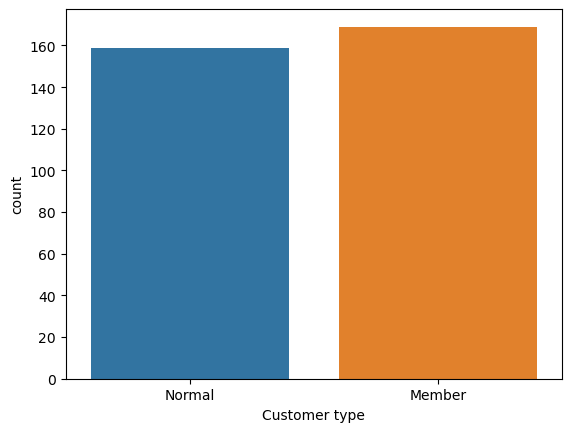

In [23]:
sns.countplot(c['Customer type'],data=c)
plt.show()

In [24]:
df['Date']=pd.to_datetime(df['Date'])

In [25]:
df['Days']=df['Date'].dt.day_name()

In [26]:
df['month']=df['Date'].dt.month_name()

In [27]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,Saturday,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,Friday,February


In [28]:
i=df.groupby(['month','Days'])['gross income'].sum().reset_index().sort_values( by='gross income', ascending=False)

In [29]:
i

,month,Days,gross income
16,March,Saturday,1227.1870
12,January,Tuesday,1009.7385
11,January,Thursday,924.5895
9,January,Saturday,861.6040
13,January,Wednesday,848.0180
19,March,Tuesday,838.6350
0,February,Friday,800.1090
3,February,Sunday,791.9515
14,March,Friday,757.3600
10,January,Sunday,683.6550


In [30]:
z=df.groupby(['month'])['gross income'].sum().reset_index().sort_values(by='gross income',ascending=False)
z

,month,gross income
1,January,5537.708
2,March,5212.167
0,February,4629.494


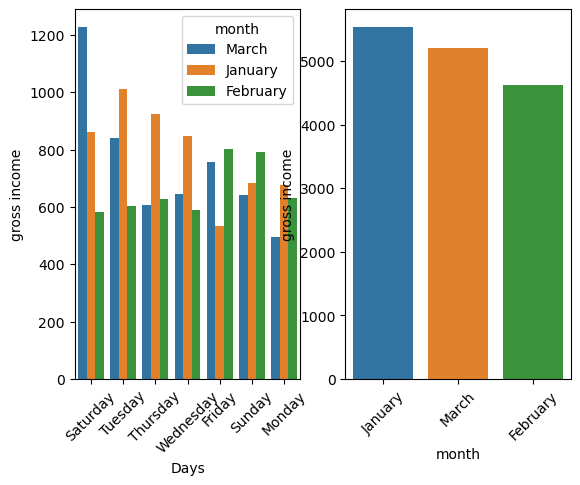

In [31]:
plt.subplot(1,2,1)
sns.barplot(x='Days',y='gross income',hue='month',data=i)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='month',y='gross income',data=z)
plt.xticks(rotation=45)
plt.show()

 # which mode of payment is highly used

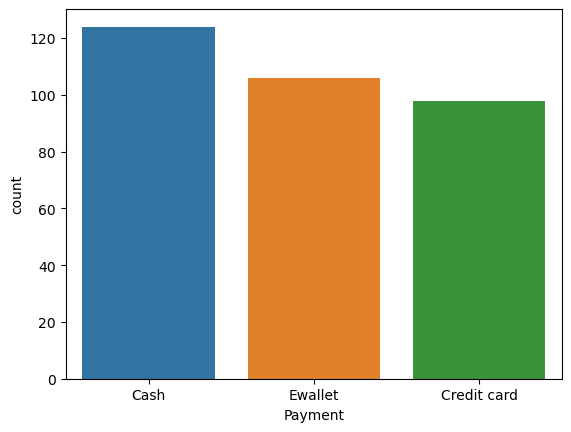

In [33]:
sns.countplot(x='Payment',data=c)
plt.show()

In [34]:
c['Payment'].value_counts()

Cash           124
Ewallet        106
Credit card     98
Name: Payment, dtype: int64

In [35]:
df.groupby(['Gender','Customer type'])['gross income'].sum()

Gender  Customer type
Female  Member           4197.4735
        Normal           3796.9515
Male    Member           3622.6905
        Normal           3762.2535
Name: gross income, dtype: float64

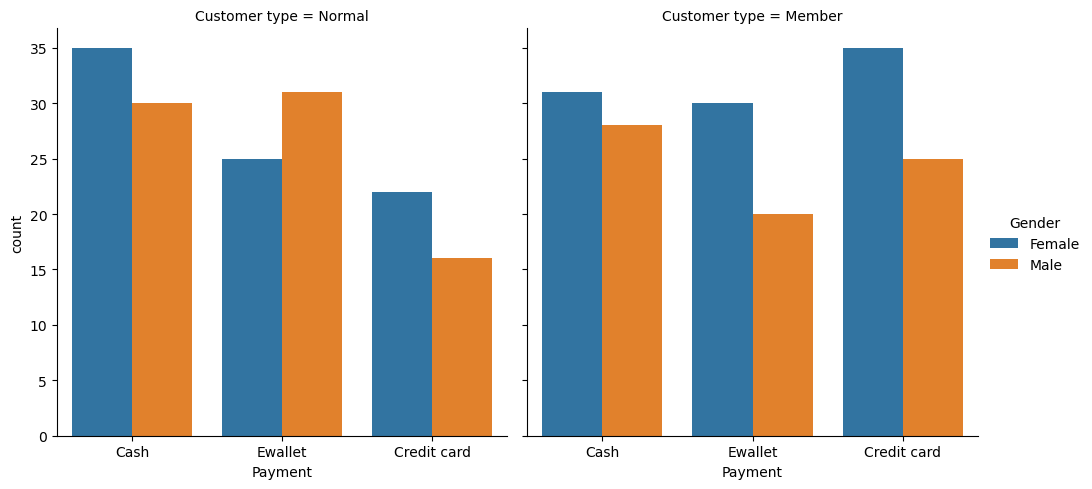

In [36]:
sns.catplot(x='Payment',hue='Gender',kind='count',col='Customer type',data=c)
plt.show()

In [37]:
products=c.groupby(['Product line'])['gross income'].sum().reset_index()


In [38]:
products

,Product line,gross income
0,Electronic accessories,903.2845
1,Fashion accessories,1026.6700
2,Food and beverages,1131.7550
3,Health and beauty,791.2060
4,Home and lifestyle,661.6930
5,Sports and travel,750.5680


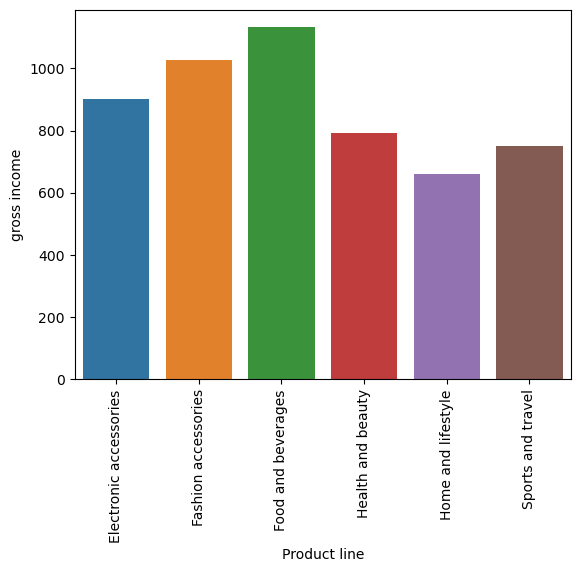

In [39]:
sns.barplot(x='Product line',y='gross income',data=products)
plt.xticks(rotation=90)
plt.show()

In [40]:
# Availability of Products

In [41]:
c['Product line'].value_counts()/c.shape[0]*100

Food and beverages        20.121951
Fashion accessories       19.817073
Electronic accessories    16.768293
Health and beauty         15.853659
Home and lifestyle        13.719512
Sports and travel         13.719512
Name: Product line, dtype: float64

In [42]:
c_index=c['Product line'].value_counts().index
c_index

Index(['Food and beverages', 'Fashion accessories', 'Electronic accessories',
       'Health and beauty', 'Home and lifestyle', 'Sports and travel'],
      dtype='object')

In [43]:
c_values=c['Product line'].value_counts().values
c_values

array([66, 65, 55, 52, 45, 45], dtype=int64)

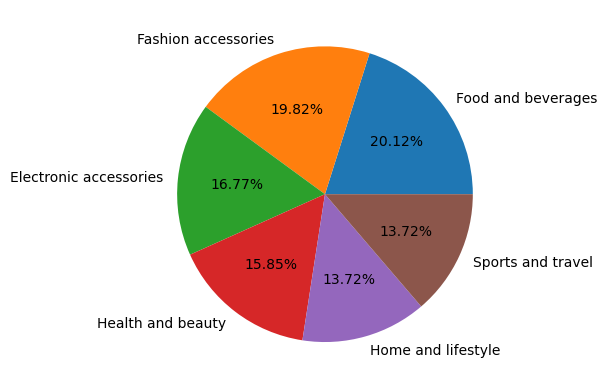

In [44]:
plt.pie(c_values,labels=c_index,autopct='%.2f%%')
plt.show()